<a href="https://colab.research.google.com/github/Yash19934/pytorch_tutorial/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.metrics import confusion_matrix

In [30]:
transform = transforms.ToTensor()

In [31]:
train_data = datasets.MNIST(root = 'cnn_data', train = True, download = True, transform = transform)
test_data = datasets.MNIST(root = 'cnn_data', train = False, download = True, transform = transform)

In [32]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [33]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [34]:
#batch size of 10

batch_size = 10
train_loader = DataLoader(train_data, batch_size = 10, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 10, shuffle = False)

In [35]:
#Define CNN model, 2 conv layers
conv1 = nn.Conv2d(1,6,3,1)
conv2 = nn.Conv2d(6, 16,3,1)

In [36]:
conv1

Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))

In [37]:
for a,b in train_data:
  print(a.shape)
  print(b)
  break

torch.Size([1, 28, 28])
5


In [38]:
for i, (X_train, y_train) in enumerate(train_data):
  break

In [39]:
X_train.shape

torch.Size([1, 28, 28])

In [40]:
x = X_train.reshape(1,1,28,28)

In [41]:
temp = conv2(conv1(x))

In [42]:
F.avg_pool2d(temp,2,2).shape

torch.Size([1, 16, 12, 12])

In [43]:
x_1 = F.relu(conv1(x))

In [44]:
print(x.shape, x_1.shape)

torch.Size([1, 1, 28, 28]) torch.Size([1, 6, 26, 26])


In [45]:
x_2 = F.max_pool2d(x_1,2,2)

In [46]:
x_2.shape

torch.Size([1, 6, 13, 13])

In [47]:
x_3 = F.relu(conv2(x_2))

In [48]:
x_3.shape

torch.Size([1, 16, 11, 11])

In [49]:
x_4 = F.max_pool2d(x_3,2,2)

In [50]:
temp = [[1,2],[2,3],[4,5]]

In [51]:
class ConvolutionalNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.maxpool1 = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,3,1)
    self.maxpool2 = nn.MaxPool2d(2,2)

    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.maxpool1(x)
    x = F.relu(self.conv2(x))
    x = self.maxpool2(x)

    x = x.reshape(-1,16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

    x = F.log_softmax(x, dim = 1)
    return x



In [52]:
torch.manual_seed(41)
model = ConvolutionalNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [54]:
import time
start_time = time.time()

# Create Variables To Tracks Things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# For Loop of Epochs
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0


  # Train
  for b,(X_train, y_train) in enumerate(train_loader):
    b+=1 # start our batches at 1
    y_pred = model(X_train) # get predicted values from the training set. Not flattened 2D
    loss = criterion(y_pred, y_train) # how off are we? Compare the predictions to correct answers in y_train

    predicted = torch.max(y_pred.data, 1)[1] # add up the number of correct predictions. Indexed off the first point
    batch_corr = (predicted == y_train).sum() # how many we got correct from this batch. True = 1, False=0, sum those up
    trn_corr += batch_corr # keep track as we go along in training.

    # Update our parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    # Print out some results
    if b%600 == 0:
      print(f'Epoch: {i}  Batch: {b}  Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)


  # Test
  with torch.no_grad(): #No gradient so we don't update our weights and biases with test data
    for b,(X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1] # Adding up correct predictions
      tst_corr += (predicted == y_test).sum() # T=1 F=0 and sum away


  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)



current_time = time.time()
total = current_time - start_time
print(f'Training Took: {total/60} minutes!')

Epoch: 0  Batch: 600  Loss: 0.16236238181591034
Epoch: 0  Batch: 1200  Loss: 0.16415396332740784
Epoch: 0  Batch: 1800  Loss: 0.5098981261253357
Epoch: 0  Batch: 2400  Loss: 0.11590572446584702
Epoch: 0  Batch: 3000  Loss: 0.005982336588203907
Epoch: 0  Batch: 3600  Loss: 0.5348214507102966
Epoch: 0  Batch: 4200  Loss: 0.005393340718001127
Epoch: 0  Batch: 4800  Loss: 0.0014583868905901909
Epoch: 0  Batch: 5400  Loss: 0.03396736457943916
Epoch: 0  Batch: 6000  Loss: 0.00043186210677959025
Epoch: 1  Batch: 600  Loss: 0.002397039206698537
Epoch: 1  Batch: 1200  Loss: 0.341083824634552
Epoch: 1  Batch: 1800  Loss: 0.0012755367206409574
Epoch: 1  Batch: 2400  Loss: 0.0019284680020064116
Epoch: 1  Batch: 3000  Loss: 0.04880313202738762
Epoch: 1  Batch: 3600  Loss: 0.25365638732910156
Epoch: 1  Batch: 4200  Loss: 0.05716976523399353
Epoch: 1  Batch: 4800  Loss: 0.0002443505509290844
Epoch: 1  Batch: 5400  Loss: 0.00035591336200013757
Epoch: 1  Batch: 6000  Loss: 0.25528591871261597
Epoch: 2 

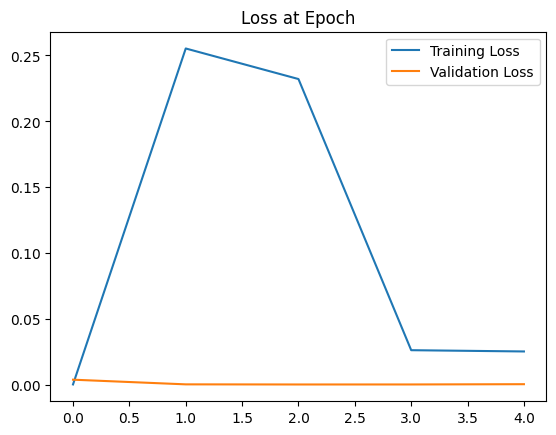

In [59]:
# Graph the loss at epoch
train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.title("Loss at Epoch")
plt.legend()

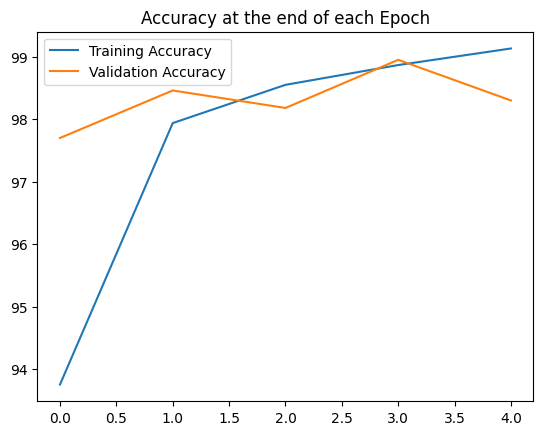

In [60]:
# graph the accuracy at the end of each epoch
plt.plot([t/600 for t in train_correct], label="Training Accuracy")
plt.plot([t/100 for t in test_correct], label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch")
plt.legend()

In [61]:
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)

with torch.no_grad():
  correct = 0
  for X_test,y_test in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()


In [64]:
correct.item()

9830

In [69]:
test_data[250][0].shape

torch.Size([1, 28, 28])

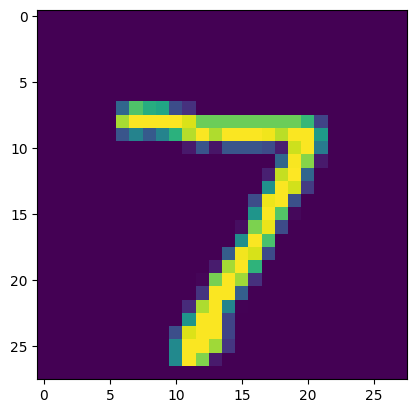

In [76]:
plt.imshow(test_data[0][0].reshape(28,28))

In [77]:
with torch.no_grad():
  new_prediction = model(test_data[0][0].view(1,1,28,28))

In [78]:
new_prediction.argmax()

tensor(7)